In [2]:
import numpy as np
import pandas as pd
import pickle

In [3]:
with open("lines.pickle", "rb") as f: # 'rb' for read binary
    lines = pickle.load(f)

In [109]:
NUM_CREW = 30
NUM_FEATURES = 3
NUM_LINES = 35

epsilon = 0.2

In [118]:
# Initialize feature matrix
F = np.zeros((NUM_FEATURES, NUM_LINES))

# Build feature matrix from line dictionary
for idx, line in lines.items():
    F[:, idx] = np.array([
        line["num_legs"],
        line["overnights"],
        line["flight_time"],
    ])

# Standardize features row-wise
F = (F - F.mean(axis=1, keepdims=True)) / F.std(axis=1, keepdims=True)


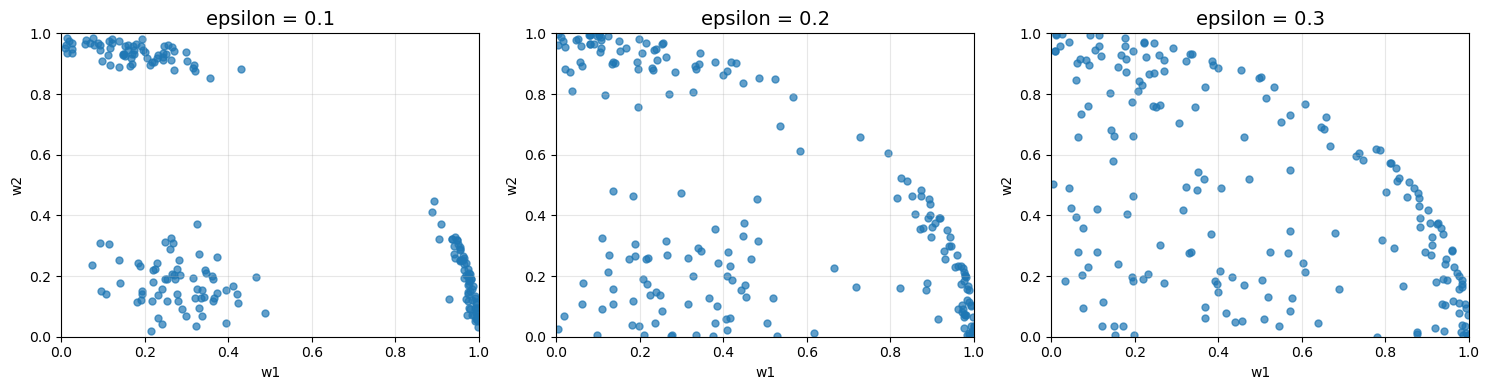

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------
# Generate randomized weight vectors
# -----------------------------------
def generate_weights(epsilon, n=200):
    """
    Generate n weight vectors in R^3 using your 3 crew 'types'
    with Gaussian noise (scaled by epsilon), positivity,
    and unit normalization.
    
    Parameters:
        epsilon (float): noise scale
        n (int): number of weight vectors
    
    Returns:
        numpy array of shape (n, 3)
    """
    
    # Base preference types (yours)
    bases = [
        np.array([1.0, 0.2, 0.1]),
        np.array([0.2, 1.0, 0.3]),
        np.array([0.3, 0.2, 1.0])
    ]
    
    W = []
    for i in range(n):
        base = bases[i % 3]
        
        # Add Gaussian noise
        w = base + epsilon * np.random.randn(3)
        
        # Enforce positivity & normalize
        w = np.abs(w)
        w = w / np.linalg.norm(w)
        
        W.append(w)
    
    return np.array(W)


# -----------------------------------
# Plot W1 vs W2 for different epsilons
# -----------------------------------
epsilons = [0.1, 0.2, 0.3]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, eps in zip(axes, epsilons):
    W = generate_weights(eps)
    
    ax.scatter(W[:, 0], W[:, 1], s=25, alpha=0.7)
    ax.set_title(f"epsilon = {eps}", fontsize=14)
    ax.set_xlabel("w1")
    ax.set_ylabel("w2")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [119]:
W = generate_weights(epsilon=0.2)

# Utility matrix
U = W @ F   # shape (NUM_CREW, NUM_LINES)

In [120]:
preferences = np.argsort(-U, axis=1)

In [121]:
np.save('preferences.npy', preferences)

In [122]:
preferences

array([[ 1,  0,  2, ..., 14, 21, 20],
       [ 1,  0,  2, ..., 20, 14, 15],
       [ 1,  0,  2, ..., 16, 15, 14],
       ...,
       [ 0,  1,  2, ..., 16, 15, 14],
       [ 1,  0,  2, ..., 21, 19, 20],
       [ 1,  5, 27, ..., 16, 15, 14]], shape=(200, 35))